In [16]:
import numpy as np

from src.fermat_weber.newton import newton_armijo
from src.fermat_weber.weiszfeld import weiszfeld
from utils.plot_utils import plot_f_and_points, plot_f_history,plot_points_and_solution_2d


Newton -> x* = [0.21132487 0.21132487]  f* = 1.9318516525781366  iters = 4
Weiszfeld -> x* = [0.21132485 0.21132485]  f* = 1.9318516525781368  iters = 41


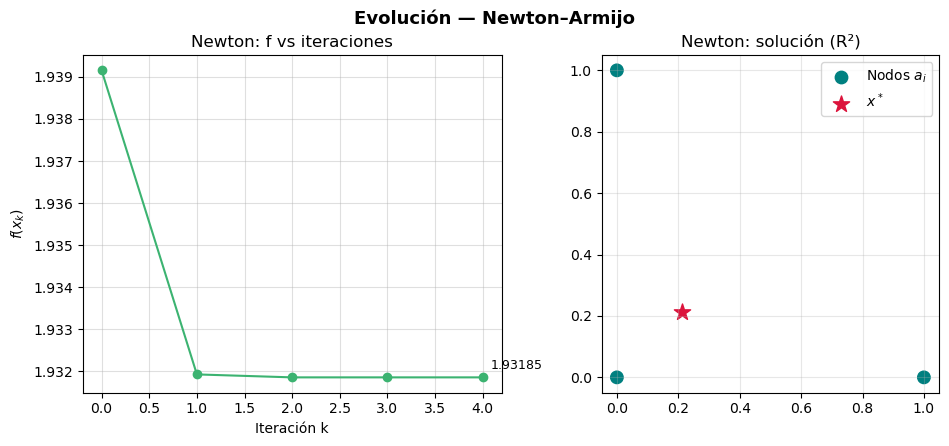

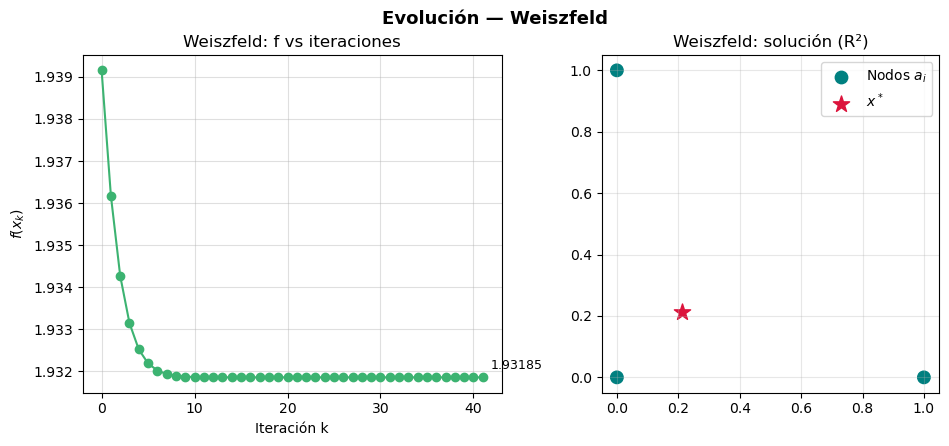

In [17]:
A = np.array([[0.0, 0.0],
              [1.0, 0.0],
              [0.0, 1.0]], dtype=float)
w = np.ones(3, dtype=float)

res_newton   = newton_armijo(A, w)
res_weisz    = weiszfeld(A, w)

print("Newton -> x* =", res_newton["x"], " f* =", res_newton["f"], " iters =", res_newton["k"])
print("Weiszfeld -> x* =", res_weisz["x"], " f* =", res_weisz["f"], " iters =", res_weisz["k"])

_ = plot_f_and_points(res_newton["hist"], A, w, res_newton["x"],
                      method_title="Newton–Armijo",
                      title_f="Newton: f vs iteraciones",
                      title_points="Newton: solución (R²)")

_ = plot_f_and_points(res_weisz["hist"], A, w, res_weisz["x"],
                      method_title="Weiszfeld",
                      title_f="Weiszfeld: f vs iteraciones",
                      title_points="Weiszfeld: solución (R²)")


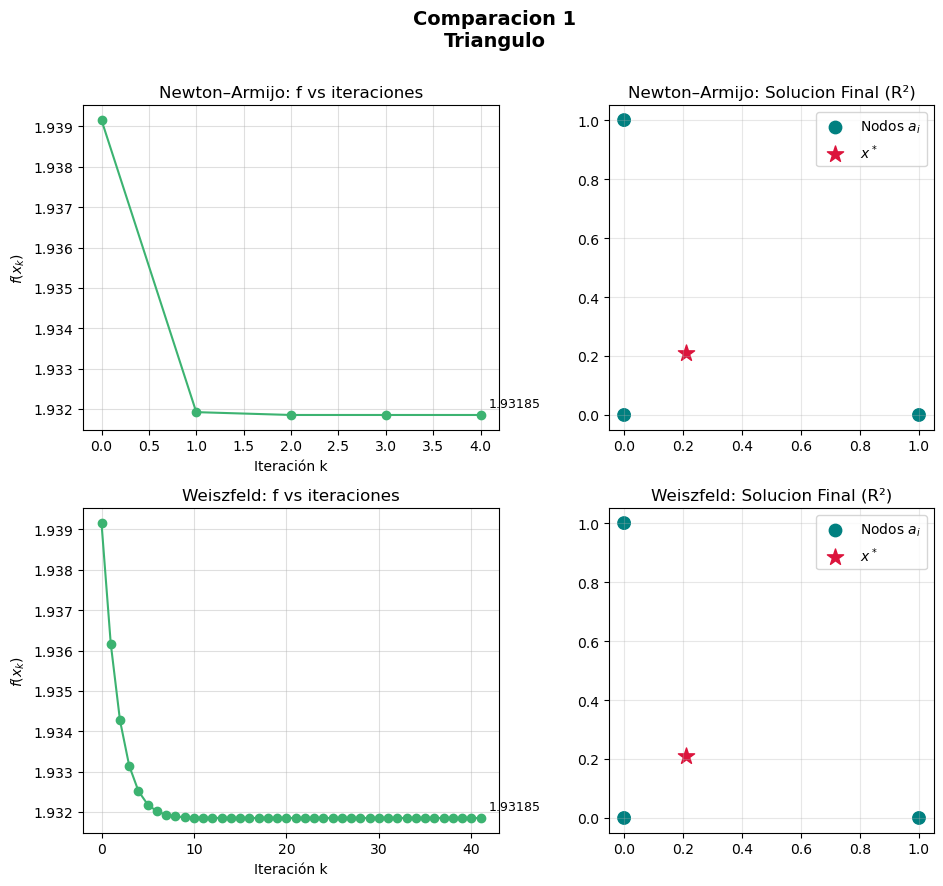

In [18]:
import matplotlib.pyplot as plt

res_newton = newton_armijo(A, w)
res_weisz = weiszfeld(A, w)

fig, axes = plt.subplots(2, 2, figsize=(10, 9))

# --- Newton ---
plot_f_history(res_newton["hist"], ax=axes[0, 0],
               title="Newton–Armijo: f vs iteraciones")
plot_points_and_solution_2d(A, w, res_newton["x"],
                            ax=axes[0, 1],
                            title="Newton–Armijo: Solucion Final (R²)",
                            path=np.array([h.get("x", res_newton["x"])
                                           for h in res_newton["hist"]
                                           if "x" in h]))

# --- Weiszfeld ---
plot_f_history(res_weisz["hist"], ax=axes[1, 0],
               title="Weiszfeld: f vs iteraciones")
plot_points_and_solution_2d(A, w, res_weisz["x"],
                            ax=axes[1, 1],
                            title="Weiszfeld: Solucion Final (R²)",
                            path=np.array([h.get("x", res_weisz["x"])
                                           for h in res_weisz["hist"]
                                           if "x" in h]))

fig.suptitle("Comparacion 1\nTriangulo\n", fontsize=14, weight="bold")
fig.tight_layout()
#fig.subplots_adjust(top=0.93)

# Guardar la figura
fig.savefig("../src/imgs/comparacion_triangulo.png", dpi=200)
plt.show()


[Newton–Armijo]
x* = 1.0  f(x*) = 3.0  iters = 0

[Weiszfeld] punto inicial
x* = 1.0  f(x*) = 3.0  iters = 5

[Weiszfeld] misma incializacion que Newton
x* = 1.0  f(x*) = 3.0  iters = 0


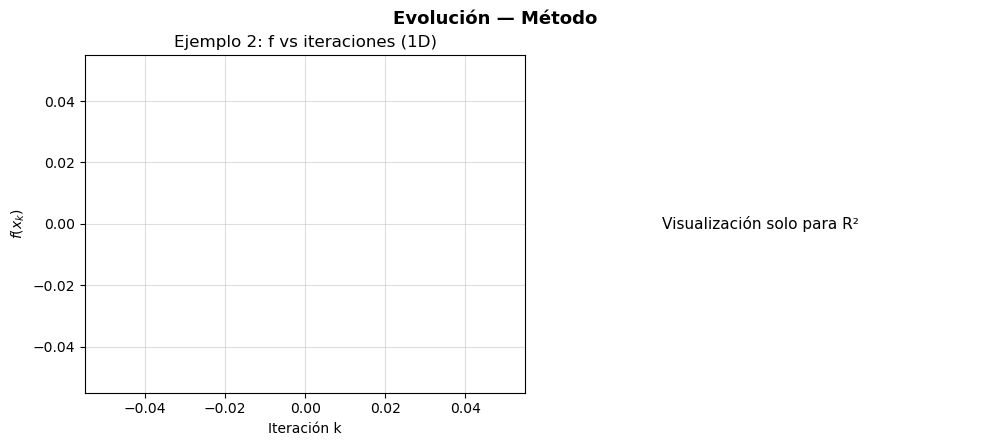

In [19]:
# Celda: Ejemplo 1D con pesos desbalanceados

A = np.array([[0.0],
              [1.0],
              [3.0]], dtype=float)
w = np.array([1.0, 2.0, 1.0], dtype=float)

x0 = np.array([0.5])  # punto inicial elegido manualmente

# Newton-Armijo
res_newton = newton_armijo(A, w)
print("[Newton–Armijo]")
print("x* =", float(res_newton["x"].ravel()[0]),
      " f(x*) =", res_newton["f"],
      " iters =", res_newton["k"])

res_weisz = weiszfeld(A, w, x0=x0)
print("\n[Weiszfeld] punto inicial")
print("x* =", float(res_weisz["x"].ravel()[0]),
      " f(x*) =", res_weisz["f"],
      " iters =", res_weisz["k"])

res_weisz = weiszfeld(A, w)
print("\n[Weiszfeld] misma incializacion que Newton")
print("x* =", float(res_weisz["x"].ravel()[0]),
      " f(x*) =", res_weisz["f"],
      " iters =", res_weisz["k"])
# Plot: f vs iteraciones (solo Newton en R¹, sin visualización espacial)
_ = plot_f_and_points(
    res_newton["hist"], A, w, res_newton["x"],
    title_f="Ejemplo 2: f vs iteraciones (1D)",
    title_points="(No aplica visualización en R²)",
    layout="1x2"
)


[Newton–Armijo]
x* = [0.74672077 0.09919746]
f(x*) = 2.3993603760097697
iteraciones = 5

[Weiszfeld]
x* = [0.74672092 0.09919741]
f(x*) = 2.3993603760097764
iteraciones = 261


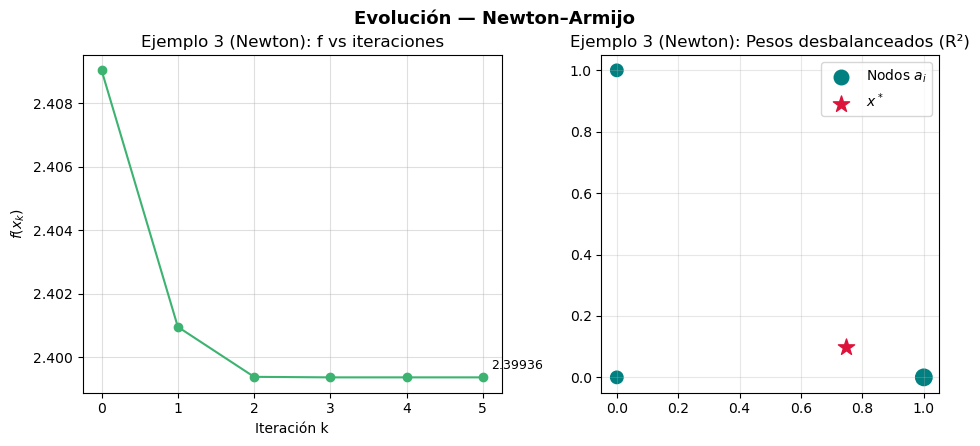

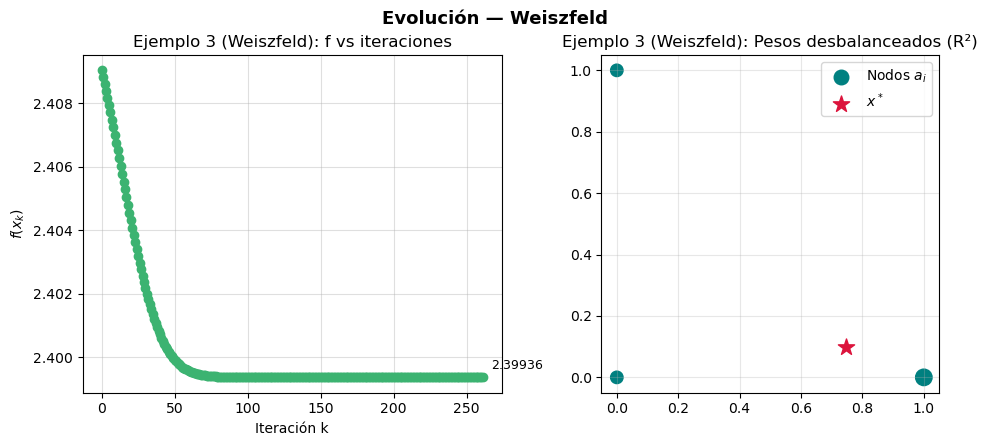

In [20]:
A = np.array([[0.0, 0.0],
              [1.0, 0.0],
              [0.0, 1.0]], dtype=float)
w = np.array([1.0, 1.75, 1.0], dtype=float)

#Newton
res_newton = newton_armijo(A, w)
print("[Newton–Armijo]")
print("x* =", res_newton["x"])
print("f(x*) =", res_newton["f"])
print("iteraciones =", res_newton["k"])

_ = plot_f_and_points(
    res_newton["hist"], A, w, res_newton["x"],
    method_title="Newton–Armijo",
    title_f="Ejemplo 3 (Newton): f vs iteraciones",
    title_points="Ejemplo 3 (Newton): Pesos desbalanceados (R²)",
    layout="1x2"
)

#Weiszfeld
res_weisz = weiszfeld(A, w, max_iter=1000)
print("\n[Weiszfeld]")
print("x* =", res_weisz["x"])
print("f(x*) =", res_weisz["f"])
print("iteraciones =", res_weisz["k"])

_ = plot_f_and_points(
    res_weisz["hist"], A, w, res_weisz["x"],
    method_title="Weiszfeld",
    title_f="Ejemplo 3 (Weiszfeld): f vs iteraciones",
    title_points="Ejemplo 3 (Weiszfeld): Pesos desbalanceados (R²)",
    layout="1x2"
)



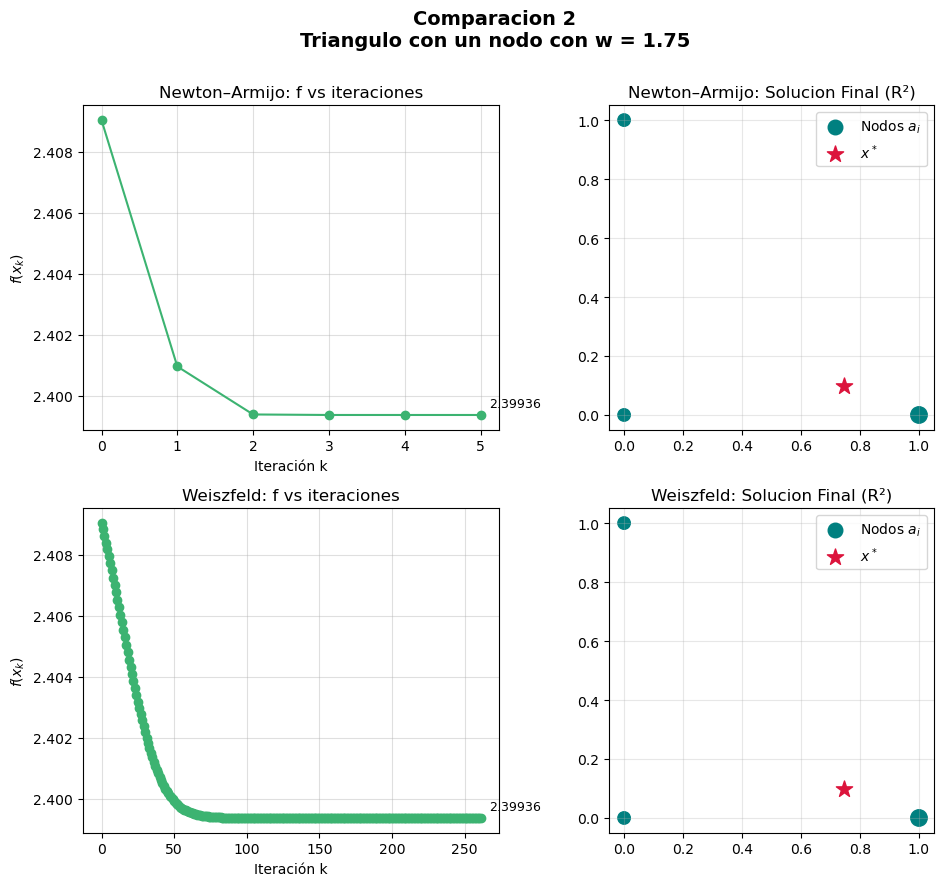

In [21]:
import matplotlib.pyplot as plt

res_newton = newton_armijo(A, w)
res_weisz = weiszfeld(A, w)

fig, axes = plt.subplots(2, 2, figsize=(10, 9))

# --- Newton ---
plot_f_history(res_newton["hist"], ax=axes[0, 0],
               title="Newton–Armijo: f vs iteraciones")
plot_points_and_solution_2d(A, w, res_newton["x"],
                            ax=axes[0, 1],
                            title="Newton–Armijo: Solucion Final (R²)",
                            path=np.array([h.get("x", res_newton["x"])
                                           for h in res_newton["hist"]
                                           if "x" in h]))

# --- Weiszfeld ---
plot_f_history(res_weisz["hist"], ax=axes[1, 0],
               title="Weiszfeld: f vs iteraciones")
plot_points_and_solution_2d(A, w, res_weisz["x"],
                            ax=axes[1, 1],
                            title="Weiszfeld: Solucion Final (R²)",
                            path=np.array([h.get("x", res_weisz["x"])
                                           for h in res_weisz["hist"]
                                           if "x" in h]))

fig.suptitle("Comparacion 2\nTriangulo con un nodo con w = 1.75\n", fontsize=14, weight="bold")
fig.tight_layout()
#fig.subplots_adjust(top=0.93)

# Guardar la figura
fig.savefig("../src/imgs/comparacion_triangulo_pesado.png", dpi=200)
plt.show()


x* = [0.32883408 0.22287635]   f(x*) = 73.86970153722707   iters = 5
[Newton–Armijo]
x* = [0.32883408 0.22287635]
f(x*) = 73.86970153722707
iteraciones = 5

[Weiszfeld]
x* = [0.32883406 0.22287634]
f(x*) = 73.86970153722709
iteraciones = 53


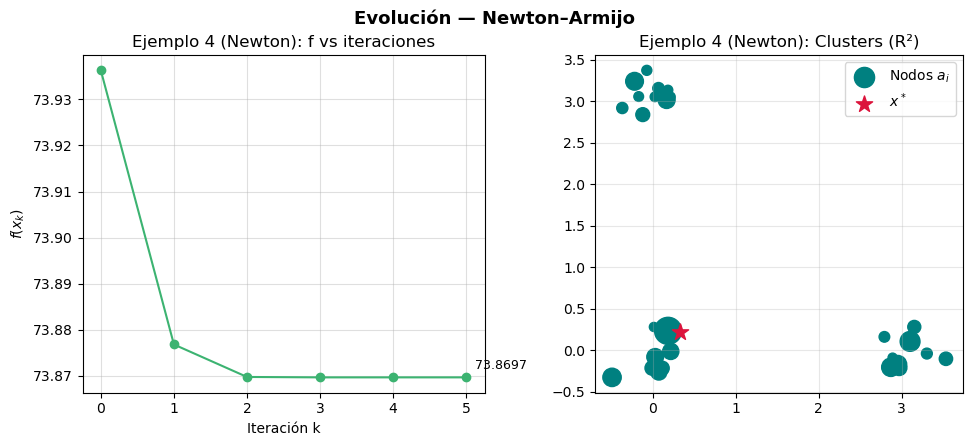

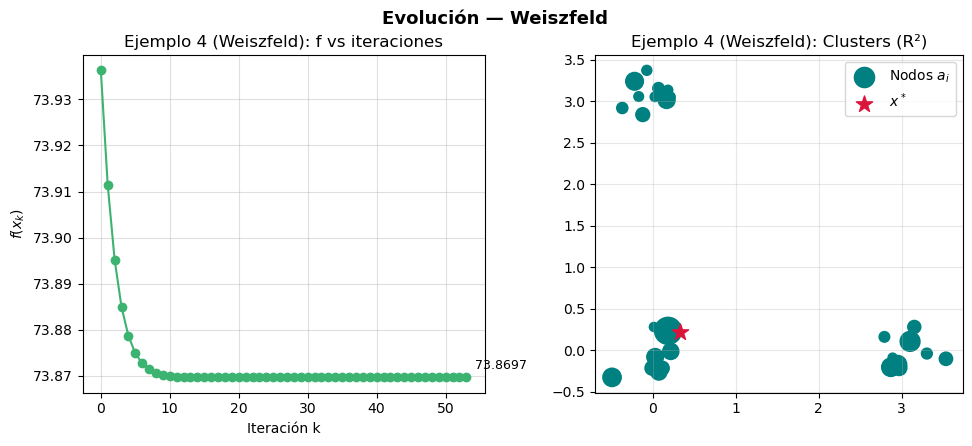

In [22]:
rng = np.random.default_rng(42)
C = np.array([[0.0, 0.0], [3.0, 0.0], [0.0, 3.0]])
A = np.vstack([c + 0.25 * rng.standard_normal((10, 2)) for c in C])
w = 0.5 + rng.exponential(0.8, size=A.shape[0])

res = newton_armijo(A, w, max_iter=300)
print("x* =", res["x"], "  f(x*) =", res["f"], "  iters =", res["k"])


#Newton
res_newton = newton_armijo(A, w)
print("[Newton–Armijo]")
print("x* =", res_newton["x"])
print("f(x*) =", res_newton["f"])
print("iteraciones =", res_newton["k"])

_ = plot_f_and_points(
    res_newton["hist"], A, w, res_newton["x"],
    method_title="Newton–Armijo",
    title_f="Ejemplo 4 (Newton): f vs iteraciones",
    title_points="Ejemplo 4 (Newton): Clusters (R²)",
    layout="1x2"
)

#Weiszfeld
res_weisz = weiszfeld(A, w, max_iter=1000)
print("\n[Weiszfeld]")
print("x* =", res_weisz["x"])
print("f(x*) =", res_weisz["f"])
print("iteraciones =", res_weisz["k"])

_ = plot_f_and_points(
    res_weisz["hist"], A, w, res_weisz["x"],
    method_title="Weiszfeld",
    title_f="Ejemplo 4 (Weiszfeld): f vs iteraciones",
    title_points="Ejemplo 4 (Weiszfeld): Clusters (R²)",
    layout="1x2"
)

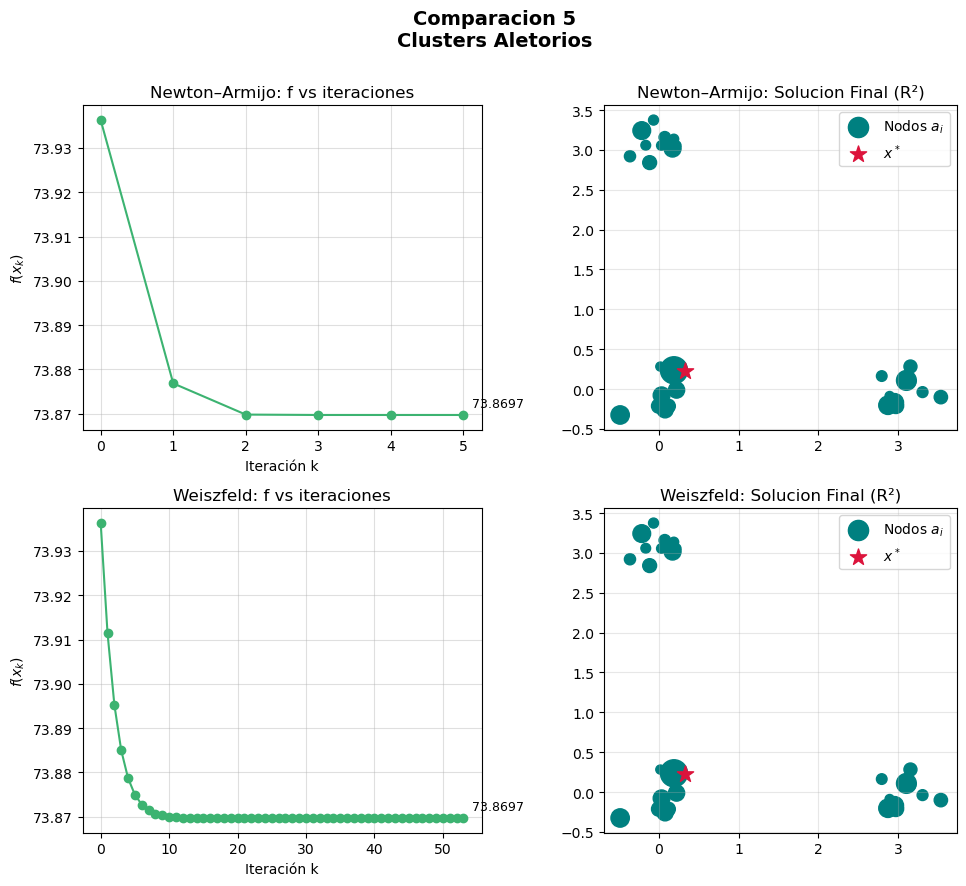

In [23]:
import matplotlib.pyplot as plt

res_newton = newton_armijo(A, w)
res_weisz = weiszfeld(A, w)

fig, axes = plt.subplots(2, 2, figsize=(10, 9))

# --- Newton ---
plot_f_history(res_newton["hist"], ax=axes[0, 0],
               title="Newton–Armijo: f vs iteraciones")
plot_points_and_solution_2d(A, w, res_newton["x"],
                            ax=axes[0, 1],
                            title="Newton–Armijo: Solucion Final (R²)",
                            path=np.array([h.get("x", res_newton["x"])
                                           for h in res_newton["hist"]
                                           if "x" in h]))

# --- Weiszfeld ---
plot_f_history(res_weisz["hist"], ax=axes[1, 0],
               title="Weiszfeld: f vs iteraciones")
plot_points_and_solution_2d(A, w, res_weisz["x"],
                            ax=axes[1, 1],
                            title="Weiszfeld: Solucion Final (R²)",
                            path=np.array([h.get("x", res_weisz["x"])
                                           for h in res_weisz["hist"]
                                           if "x" in h]))

fig.suptitle("Comparacion 5\nClusters Aletorios\n", fontsize=14, weight="bold")
fig.tight_layout()
#fig.subplots_adjust(top=0.93)

# Guardar la figura
fig.savefig("../src/imgs/05comparacion_clusters.png", dpi=200)
plt.show()

[Newton–Armijo]
x* = [0.33744106 0.50172678]
f(x*) = 9.091414644680818
iteraciones = 4

[Weiszfeld]
x* = [0.33744104 0.5017268 ]
f(x*) = 9.091414644680826
iteraciones = 51


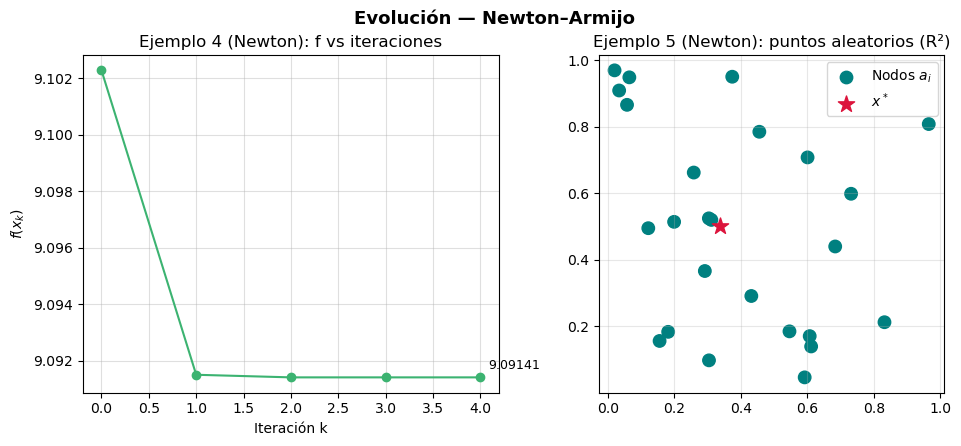

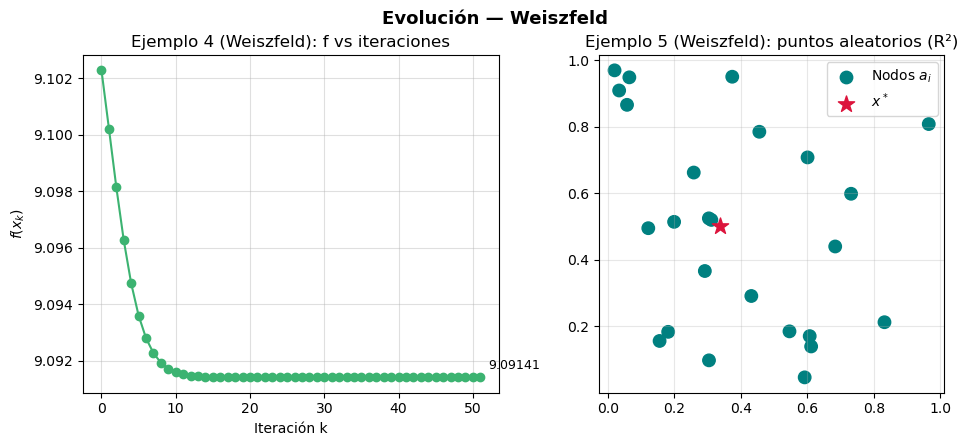

In [24]:
n = 25
A = np.random.rand(n,2)
w = np.ones(n,dtype=float)

np.random.seed(42)
n = 25
A = np.random.rand(n, 2)
w = np.ones(n, dtype=float)

res_newton = newton_armijo(A, w, max_iter=300)
print("[Newton–Armijo]")
print("x* =", res_newton["x"])
print("f(x*) =", res_newton["f"])
print("iteraciones =", res_newton["k"])

_ = plot_f_and_points(
    res_newton["hist"], A, w, res_newton["x"],
    method_title="Newton–Armijo",
    title_f="Ejemplo 4 (Newton): f vs iteraciones",
    title_points="Ejemplo 5 (Newton): puntos aleatorios (R²)",
    layout="1x2"
)

res_weisz = weiszfeld(A, w, max_iter=1000)
print("\n[Weiszfeld]")
print("x* =", res_weisz["x"])
print("f(x*) =", res_weisz["f"])
print("iteraciones =", res_weisz["k"])

_ = plot_f_and_points(
    res_weisz["hist"], A, w, res_weisz["x"],
    method_title="Weiszfeld",
    title_f="Ejemplo 4 (Weiszfeld): f vs iteraciones",
    title_points="Ejemplo 5 (Weiszfeld): puntos aleatorios (R²)",
    layout="1x2"
)


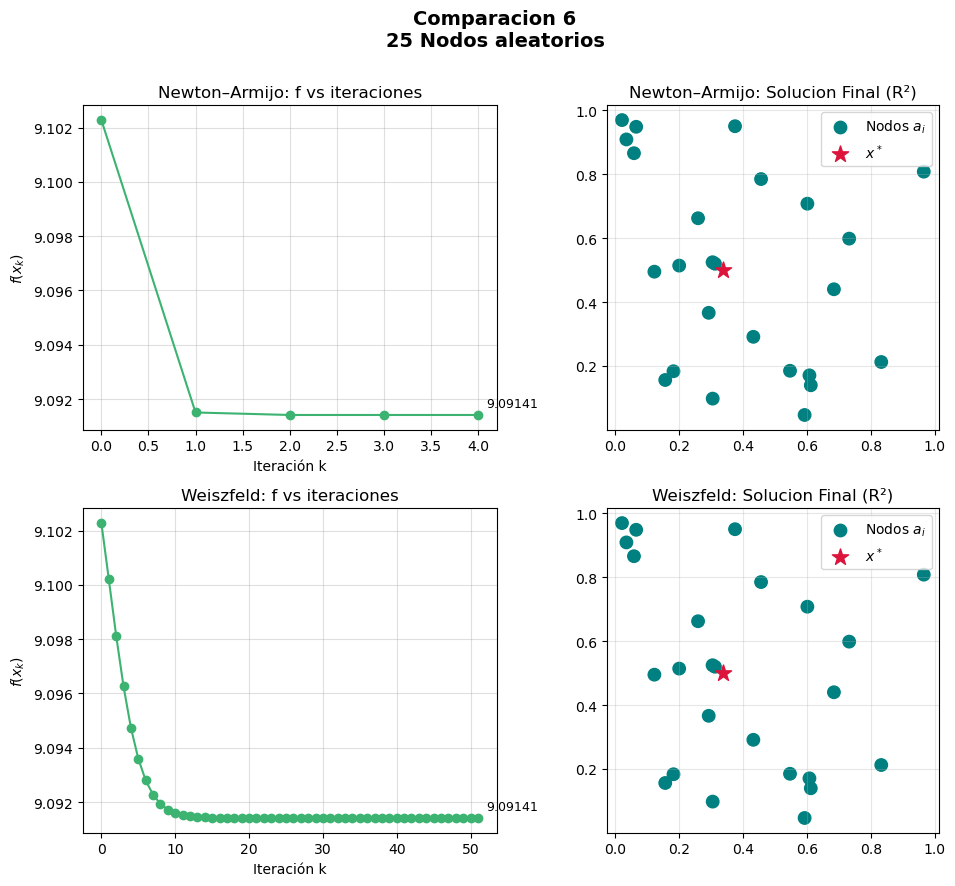

In [25]:
import matplotlib.pyplot as plt

res_newton = newton_armijo(A, w)
res_weisz = weiszfeld(A, w)

fig, axes = plt.subplots(2, 2, figsize=(10, 9))

# --- Newton ---
plot_f_history(res_newton["hist"], ax=axes[0, 0],
               title="Newton–Armijo: f vs iteraciones")
plot_points_and_solution_2d(A, w, res_newton["x"],
                            ax=axes[0, 1],
                            title="Newton–Armijo: Solucion Final (R²)",
                            path=np.array([h.get("x", res_newton["x"])
                                           for h in res_newton["hist"]
                                           if "x" in h]))

# --- Weiszfeld ---
plot_f_history(res_weisz["hist"], ax=axes[1, 0],
               title="Weiszfeld: f vs iteraciones")
plot_points_and_solution_2d(A, w, res_weisz["x"],
                            ax=axes[1, 1],
                            title="Weiszfeld: Solucion Final (R²)",
                            path=np.array([h.get("x", res_weisz["x"])
                                           for h in res_weisz["hist"]
                                           if "x" in h]))

fig.suptitle("Comparacion 6\n25 Nodos aleatorios\n", fontsize=14, weight="bold")
fig.tight_layout()
#fig.subplots_adjust(top=0.93)

# Guardar la figura
fig.savefig("../src/imgs/random.png", dpi=200)
plt.show()

[Newton–Armijo]
x* = [-2.76098515e-16  2.41717475e-16]
f(x*) = 24.0
iteraciones = 3

[Weiszfeld]
x* = [-4.62592927e-16  5.14320161e-09]
f(x*) = 23.999999999999996
iteraciones = 26


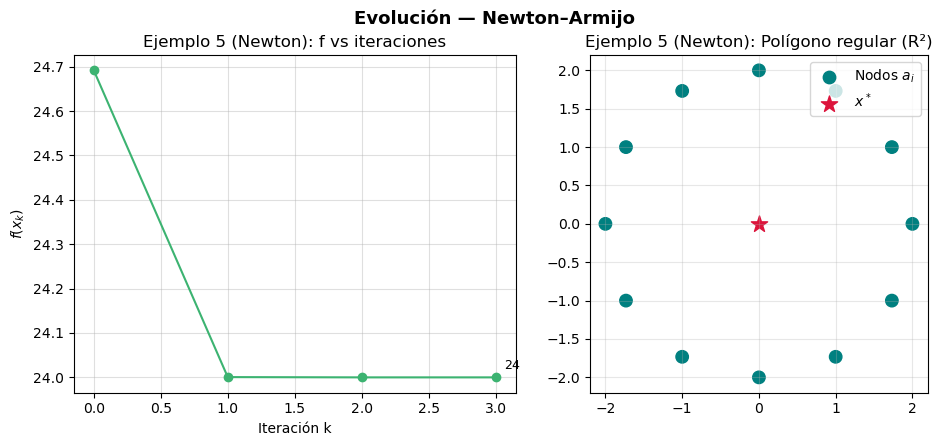

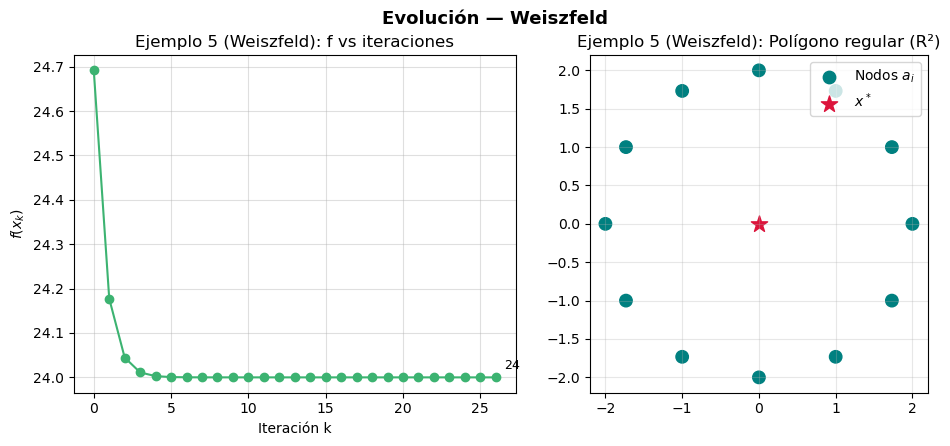

In [26]:
# Celda A: Poligono regular pesos iguales → x* = (0,0)

def regular_ngon(n=12, R=2.0, center=(0.0, 0.0)):
    theta = np.linspace(0, 2 * np.pi, n, endpoint=False)
    A = np.c_[center[0] + R * np.cos(theta), center[1] + R * np.sin(theta)]
    w = np.ones(n)
    return A, w

A, w = regular_ngon(n=12, R=2.0, center=(0.0, 0.0))

res_newton = newton_armijo(A, w)
print("[Newton–Armijo]")
print("x* =", res_newton["x"])
print("f(x*) =", res_newton["f"])
print("iteraciones =", res_newton["k"])

_ = plot_f_and_points(
    res_newton["hist"], A, w, res_newton["x"],
    method_title="Newton–Armijo",
    title_f="Ejemplo 5 (Newton): f vs iteraciones",
    title_points="Ejemplo 5 (Newton): Polígono regular (R²)",
    layout="1x2"
)

res_weisz = weiszfeld(A, w, max_iter=1000)
print("\n[Weiszfeld]")
print("x* =", res_weisz["x"])
print("f(x*) =", res_weisz["f"])
print("iteraciones =", res_weisz["k"])

_ = plot_f_and_points(
    res_weisz["hist"], A, w, res_weisz["x"],
    method_title="Weiszfeld",
    title_f="Ejemplo 5 (Weiszfeld): f vs iteraciones",
    title_points="Ejemplo 5 (Weiszfeld): Polígono regular (R²)",
    layout="1x2"
)

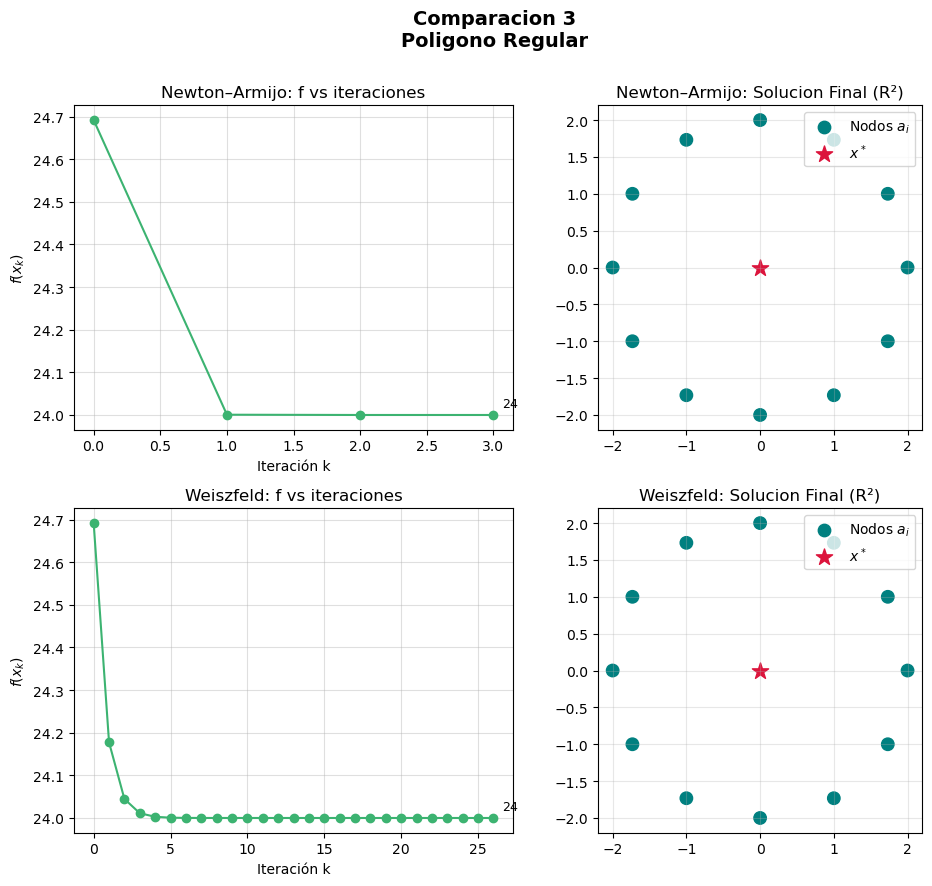

In [27]:
import matplotlib.pyplot as plt

res_newton = newton_armijo(A, w)
res_weisz = weiszfeld(A, w)

fig, axes = plt.subplots(2, 2, figsize=(10, 9))

# --- Newton ---
plot_f_history(res_newton["hist"], ax=axes[0, 0],
               title="Newton–Armijo: f vs iteraciones")
plot_points_and_solution_2d(A, w, res_newton["x"],
                            ax=axes[0, 1],
                            title="Newton–Armijo: Solucion Final (R²)",
                            path=np.array([h.get("x", res_newton["x"])
                                           for h in res_newton["hist"]
                                           if "x" in h]))

# --- Weiszfeld ---
plot_f_history(res_weisz["hist"], ax=axes[1, 0],
               title="Weiszfeld: f vs iteraciones")
plot_points_and_solution_2d(A, w, res_weisz["x"],
                            ax=axes[1, 1],
                            title="Weiszfeld: Solucion Final (R²)",
                            path=np.array([h.get("x", res_weisz["x"])
                                           for h in res_weisz["hist"]
                                           if "x" in h]))

fig.suptitle("Comparacion 3\nPoligono Regular\n", fontsize=14, weight="bold")
fig.tight_layout()
#fig.subplots_adjust(top=0.93)

# Guardar la figura
fig.savefig("../src/imgs/poligono.png", dpi=200)
plt.show()


[Newton–Armijo]
x* = [-0.03962803  0.10315106]   (esperado ≈ [0, 0])
f(x*) = 33.4896309119391   iteraciones = 7

[Weiszfeld]
x* = [-0.03962862  0.10315107]   (esperado ≈ [0, 0])
f(x*) = 33.48963091193913   iteraciones = 860


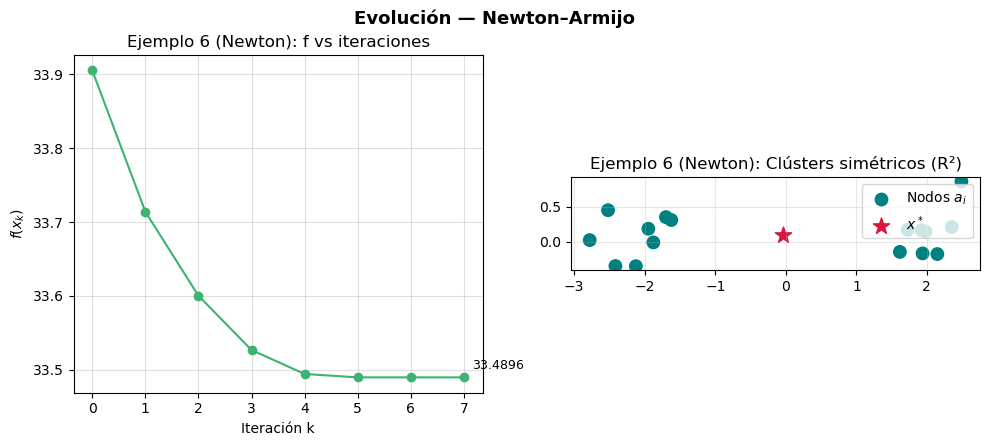

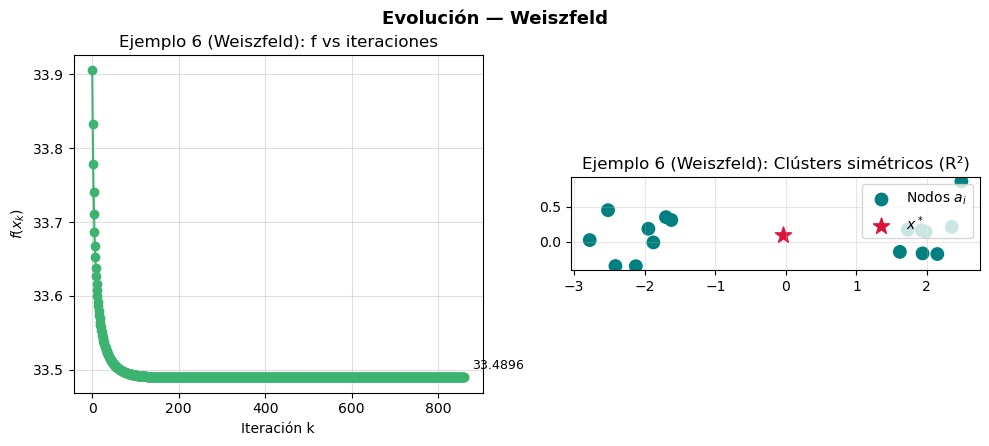

In [28]:
rng = np.random.default_rng(42)
n_per = 8
d = 2

rng = np.random.default_rng(42)
n_per = 8
d = 2

left  = np.c_[-d + 0.4 * rng.standard_normal(n_per), 0.4 * rng.standard_normal(n_per)]
right = np.c_[ d + 0.4 * rng.standard_normal(n_per), 0.4 * rng.standard_normal(n_per)]
A = np.vstack([left, right])
w = np.ones(A.shape[0])  # mismo peso total a cada lado

res_newton = newton_armijo(A, w, max_iter=300)
print("[Newton–Armijo]")
print("x* =", res_newton["x"], "  (esperado ≈ [0, 0])")
print("f(x*) =", res_newton["f"], "  iteraciones =", res_newton["k"])

_ = plot_f_and_points(
    res_newton["hist"], A, w, res_newton["x"],
    method_title="Newton–Armijo",
    title_f="Ejemplo 6 (Newton): f vs iteraciones",
    title_points="Ejemplo 6 (Newton): Clústers simétricos (R²)",
    layout="1x2"
)

res_weisz = weiszfeld(A, w, max_iter=1000)
print("\n[Weiszfeld]")
print("x* =", res_weisz["x"], "  (esperado ≈ [0, 0])")
print("f(x*) =", res_weisz["f"], "  iteraciones =", res_weisz["k"])

_ = plot_f_and_points(
    res_weisz["hist"], A, w, res_weisz["x"],
    method_title="Weiszfeld",
    title_f="Ejemplo 6 (Weiszfeld): f vs iteraciones",
    title_points="Ejemplo 6 (Weiszfeld): Clústers simétricos (R²)",
    layout="1x2"
)


[Newton–Armijo]
x* = [-2.26169973e-16  3.82737131e-16]   (esperado ≈ [0, 0])
f(x*) = 14.142135623730951   iteraciones = 4

[Weiszfeld]
x* = [ 2.26860064e-08 -2.26860065e-08]   (esperado ≈ [0, 0])
f(x*) = 14.142135623730951   iteraciones = 77


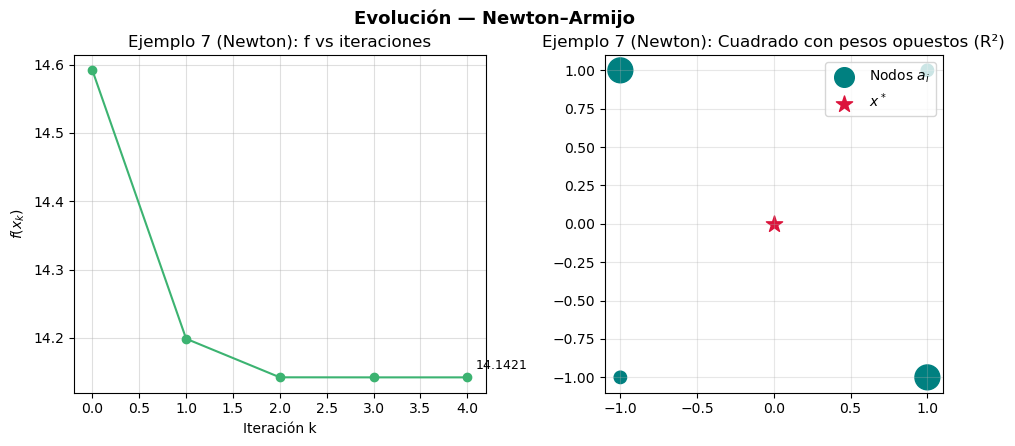

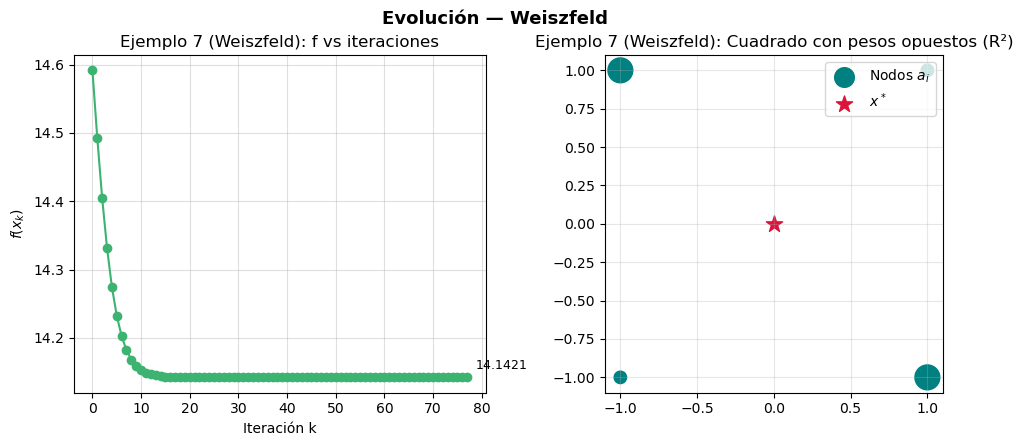

In [29]:
# Cuadrado con pesos por pares opuestos → x* = centro
A = np.array([[-1.0, -1.0],
              [ 1.0, -1.0],
              [ 1.0,  1.0],
              [-1.0,  1.0]], dtype=float)

# Pares opuestos con el mismo peso (w0==w2, w1==w3)
w = np.array([1.0, 4.0, 1.0, 4.0], dtype=float)

res_newton = newton_armijo(A, w)
print("[Newton–Armijo]")
print("x* =", res_newton["x"], "  (esperado ≈ [0, 0])")
print("f(x*) =", res_newton["f"], "  iteraciones =", res_newton["k"])

_ = plot_f_and_points(
    res_newton["hist"], A, w, res_newton["x"],
    method_title="Newton–Armijo",
    title_f="Ejemplo 7 (Newton): f vs iteraciones",
    title_points="Ejemplo 7 (Newton): Cuadrado con pesos opuestos (R²)",
    layout="1x2"
)

res_weisz = weiszfeld(A, w, max_iter=1000)
print("\n[Weiszfeld]")
print("x* =", res_weisz["x"], "  (esperado ≈ [0, 0])")
print("f(x*) =", res_weisz["f"], "  iteraciones =", res_weisz["k"])

_ = plot_f_and_points(
    res_weisz["hist"], A, w, res_weisz["x"],
    method_title="Weiszfeld",
    title_f="Ejemplo 7 (Weiszfeld): f vs iteraciones",
    title_points="Ejemplo 7 (Weiszfeld): Cuadrado con pesos opuestos (R²)",
    layout="1x2"
)



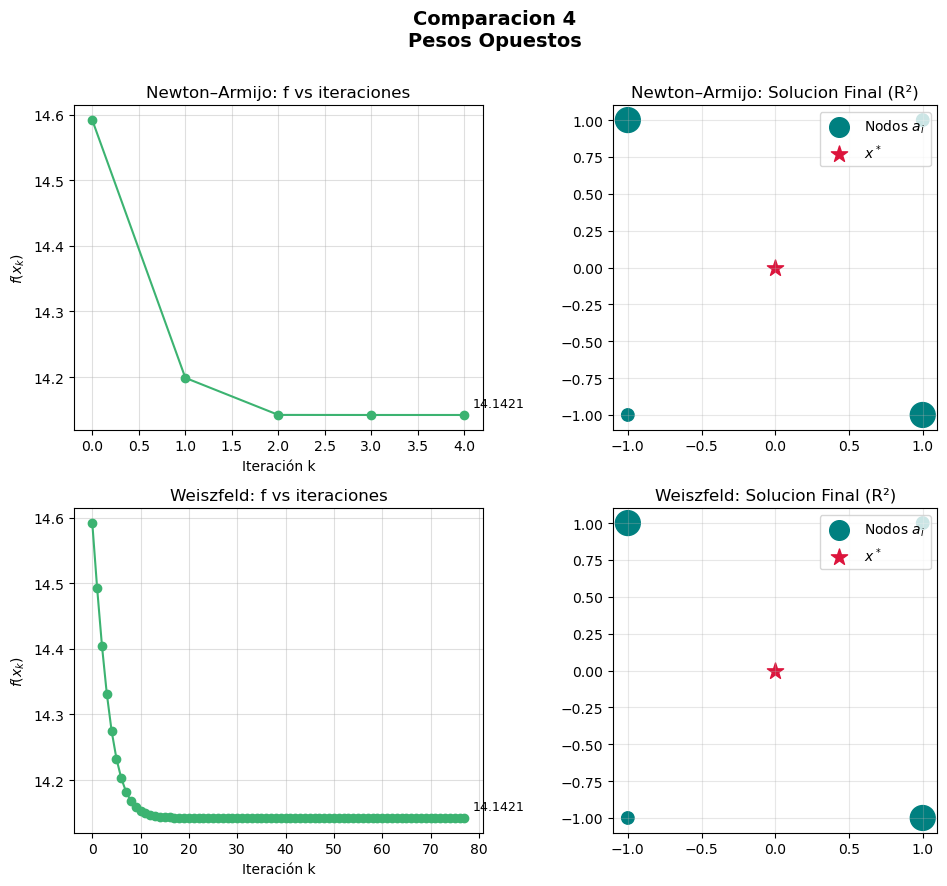

In [30]:
import matplotlib.pyplot as plt

res_newton = newton_armijo(A, w)
res_weisz = weiszfeld(A, w)

fig, axes = plt.subplots(2, 2, figsize=(10, 9))

# --- Newton ---
plot_f_history(res_newton["hist"], ax=axes[0, 0],
               title="Newton–Armijo: f vs iteraciones")
plot_points_and_solution_2d(A, w, res_newton["x"],
                            ax=axes[0, 1],
                            title="Newton–Armijo: Solucion Final (R²)",
                            path=np.array([h.get("x", res_newton["x"])
                                           for h in res_newton["hist"]
                                           if "x" in h]))

# --- Weiszfeld ---
plot_f_history(res_weisz["hist"], ax=axes[1, 0],
               title="Weiszfeld: f vs iteraciones")
plot_points_and_solution_2d(A, w, res_weisz["x"],
                            ax=axes[1, 1],
                            title="Weiszfeld: Solucion Final (R²)",
                            path=np.array([h.get("x", res_weisz["x"])
                                           for h in res_weisz["hist"]
                                           if "x" in h]))

fig.suptitle("Comparacion 4\nPesos Opuestos\n", fontsize=14, weight="bold")
fig.tight_layout()
#fig.subplots_adjust(top=0.93)

# Guardar la figura
fig.savefig("../src/imgs/equilibrio.png", dpi=200)
plt.show()
